# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this project, I have build a traffic sign classifier using deep neural network. The daa used to train the model is german traffic sign data. 

---
## Step 0: Load The Data

Here I am loading data to train, validate and test neural network.

In [1]:
# Load pickled data
import hashlib
import os
import os.path
import cv2
import pickle
from urllib.request import urlretrieve
from sklearn.utils import shuffle
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile
import random
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline



# TO download trainning data if not available
def download(url, file):
    if not os.path.isfile(file):
        print('Downloading ' + file + '...')
        urlretrieve(url, file)
        print('Download Finished')

download('https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip', 'traffic-signs-data.zip')

# Wait until you see that all files have been downloaded.
print('Training data downloaded')

# Unzip training data
zip = ZipFile('traffic-signs-data.zip')
zip.extractall()

# Read training data
training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Training data downloaded


---

## Step 1: Dataset Summary & Exploration

Summary of dataset is as below:

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# get number of training examples
n_train = len(y_train)

# get number of validation examples
n_validation = len(y_valid)

# get number of testing examples.
n_test = len(y_test)

# get shape of an traffic sign image
image_shape = X_train[0].shape

# get unique classes from training dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### exploratory visualization of the dataset

Here I have displayed a random image from dataset with its label value

1


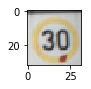

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Display a random image from training data with its label
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Here I am designing the model and training it to classify german traffic signs.

### Pre-process the Data Set

Here I am normalizing data set to minimize differences between values so that model can be train better.

7


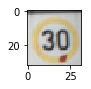

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Shuffling data before training
X_train, y_train = shuffle(X_train, y_train)

# Normalizing data before training
X_train = 0.1 + ((X_train)*(0.9-0.1))/255
X_valid = 0.1 + ((X_valid)*(0.9-0.1))/255
X_test = 0.1 + ((X_test)*(0.9-0.1))/255

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

### Model Architecture

Here I have used LeNet architecure and modified it by adding dropout and one more convolution layer. My model architecture is as below:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Droupout	     		| 												|
| Max pooling	      	| 1x1 stride,  outputs 28x28x6 			    	|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 28x28x10 	|
| RELU					|												|
| Droupout	     		| 												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x10			    	|
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 10x10x16 	|
| RELU					|												|
| Droupout	     		| 												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16   		    	|
| Fully Connected     	| Input 400, output 120                     	|
| RELU					|												|
| Droupout	     		| 												|
| Fully Connected    	| Input 120, output 84                      	|
| RELU					|												|
| Droupout	     		| 												|
| Fully Connected    	| Input 84, output 43                       	|
| RELU					|												|
| Droupout	     		| 												|

In [5]:

# number of epochs for which model will be trained
EPOCHS = 70

# batch size for each epoch
BATCH_SIZE = 128

# Model architecture for Traffic sign classification
def TrafficNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1,keep_prob=drop_rate1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
    
    # SOLUTION: Layer 2: Convolutional. Input 28x28x6. Output = 28X28x10
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 10), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(10))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2,keep_prob=drop_rate1)

    # SOLUTION: Pooling. Input = 28x28x10. Output = 14x14x10.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    

    # SOLUTION: Layer 3: Convolutional. Output = 10x10x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3,keep_prob=drop_rate1)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob=drop_rate1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob=drop_rate2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

Now as my model design is complete, I will train, validate and test the model to tune parameters like number of epochs, learning rate etc.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
drop_rate1 = tf.placeholder(tf.float32, (None))
drop_rate2 = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, 43)

Here I am defining training pipeline.

In [7]:
## Training pipeline

rate = 0.0005

logits = TrafficNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Here I am defining evaluation model

In [8]:
##Evaluate model

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, drop_rate1:1.0, drop_rate2:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Now, As my training pipeline and evaluation pipeline are created, I will start training the model.

In [9]:
##Train model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, drop_rate1:0.65, drop_rate2:0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.461

EPOCH 2 ...
Validation Accuracy = 0.630

EPOCH 3 ...
Validation Accuracy = 0.744

EPOCH 4 ...
Validation Accuracy = 0.792

EPOCH 5 ...
Validation Accuracy = 0.812

EPOCH 6 ...
Validation Accuracy = 0.837

EPOCH 7 ...
Validation Accuracy = 0.856

EPOCH 8 ...
Validation Accuracy = 0.875

EPOCH 9 ...
Validation Accuracy = 0.883

EPOCH 10 ...
Validation Accuracy = 0.897

EPOCH 11 ...
Validation Accuracy = 0.907

EPOCH 12 ...
Validation Accuracy = 0.901

EPOCH 13 ...
Validation Accuracy = 0.911

EPOCH 14 ...
Validation Accuracy = 0.913

EPOCH 15 ...
Validation Accuracy = 0.920

EPOCH 16 ...
Validation Accuracy = 0.921

EPOCH 17 ...
Validation Accuracy = 0.920

EPOCH 18 ...
Validation Accuracy = 0.919

EPOCH 19 ...
Validation Accuracy = 0.933

EPOCH 20 ...
Validation Accuracy = 0.919

EPOCH 21 ...
Validation Accuracy = 0.924

EPOCH 22 ...
Validation Accuracy = 0.930

EPOCH 23 ...
Validation Accuracy = 0.932

EPOCH 24 ...
Validation Accura

Now as training is complete, let's evaluate model on test data.

In [10]:
## Test model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.949


---

## Step 3: Test a Model on New Images

As test accuracy is satiesfactory, I will try to test model on 5 random images downloaded from internet.

### Load and Output the Images

Below are the images from internet which I am going to use to test model.

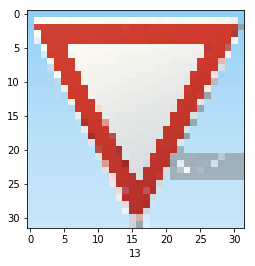

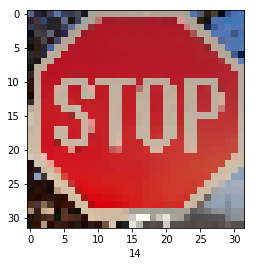

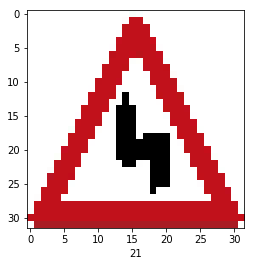

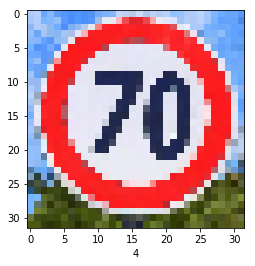

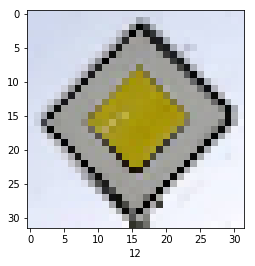

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.



def get_files_from_directory(path='self-test-data'):
    x=[]
    y=[]
    for file in os.listdir(path) :    
        image = cv2.imread(path+'/'+file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image =cv2.resize(image,(32,32))
        x.append(image)
        y.append(file.split('.')[0])
    return x,y

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
x_random,y_random=get_files_from_directory()

for index in range(0,len(x_random)):
    plt.figure()
    plt.imshow(x_random[index].squeeze())
    plt.xlabel(y_random[index])

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
x_custom,y_custom=get_files_from_directory()

with tf.Session() as session:
    saver.restore(session, tf.train.latest_checkpoint('.'))

    softmax = tf.nn.softmax(logits)
    probs = session.run(softmax, feed_dict={x:x_random, y:y_random, drop_rate1:1.0, drop_rate2:1.0})
    top_5 = session.run(tf.nn.top_k(probs, 5))

### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

correct_count=0

for i in range(5):
    if int(y_custom[i]) == int(top_5[1][i][0]):
        correct_count+=1

print("accuracy on random images: ",correct_count/5)

accuracy on random images:  1.0


As we can see here that sometimes image of 70 km/h is not getting classified correctly, probably because of less training data associated with that image is available.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print(np.round(top_5))

[[[  1.   0.   0.   0.   0.]
  [  1.   0.   0.   0.   0.]
  [  1.   0.   0.   0.   0.]
  [  1.   0.   0.   0.   0.]
  [  1.   0.   0.   0.   0.]]

 [[ 13.   0.   1.   2.   3.]
  [ 14.   0.   1.   2.   3.]
  [ 21.   0.   1.   2.   3.]
  [  4.   0.   1.   2.   3.]
  [ 12.   0.   1.   2.   3.]]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")